# **Assignment 2**

Savitri Dyah Ayu Pitaloka / PYTN-KS10-012

## Project Overview


Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

- Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
- This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

- Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
- Is there a difference in unit sold based on building category?
- What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

### Data Preparation

import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns
import math
import statistics
import scipy.stats

import dataset menjadi DataFrame dan melihat 5 baris teratas dari DataFrame

In [2]:
df_nyc = pd.read_csv("nyc-rolling-sales.csv")
df_nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


melihat 5 baris terbawah DataFrame

In [3]:
df_nyc.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


melihat semua kolom, tipe datanya, dan cek null values

In [4]:
df_nyc.info()
df_nyc.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

melihat shape dari DataFrame

In [5]:
df_nyc.shape

(84548, 22)

### Pre-Processing

menghapus kolom yang tidak relevan

In [6]:
df_nyc.drop(["Unnamed: 0"], axis=1, inplace=True)

melihat 5 baris teratas DataFrame yang sudah di-*update*

In [7]:
df_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


memperbaiki tipe data SALE DATE menjadi datetime

In [8]:
df_nyc['SALE DATE']= pd.to_datetime(df_nyc['SALE DATE'], errors='coerce')

memperbaiki tipe data RESIDENTIAL UNITS, COMMERCIAL UNITS, TOTAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET,SALE PRICE menjadi numeric

In [9]:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]
for col in numeric: 
    df_nyc[col] = pd.to_numeric(df_nyc[col], errors='coerce')

melihat kolom dan tipe data yang sudah di-*update*

In [10]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  object        
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  object        
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  int64         
 11  RE

cek missing value

In [11]:
df_nyc.isna().sum()/len(df_nyc)

BOROUGH                           0.000000
NEIGHBORHOOD                      0.000000
BUILDING CLASS CATEGORY           0.000000
TAX CLASS AT PRESENT              0.000000
BLOCK                             0.000000
LOT                               0.000000
EASE-MENT                         0.000000
BUILDING CLASS AT PRESENT         0.000000
ADDRESS                           0.000000
APARTMENT NUMBER                  0.000000
ZIP CODE                          0.000000
RESIDENTIAL UNITS                 0.000000
COMMERCIAL UNITS                  0.000000
TOTAL UNITS                       0.000000
LAND SQUARE FEET                  0.310498
GROSS SQUARE FEET                 0.326584
YEAR BUILT                        0.000000
TAX CLASS AT TIME OF SALE         0.000000
BUILDING CLASS AT TIME OF SALE    0.000000
SALE PRICE                        0.172222
SALE DATE                         0.000000
dtype: float64

cek blank cells sebagai NaN 

In [12]:
df_nyc.replace(' ', np.nan, inplace=True)
df_nyc.isna().sum() /len(df_nyc)

BOROUGH                           0.000000
NEIGHBORHOOD                      0.000000
BUILDING CLASS CATEGORY           0.000000
TAX CLASS AT PRESENT              0.008729
BLOCK                             0.000000
LOT                               0.000000
EASE-MENT                         1.000000
BUILDING CLASS AT PRESENT         0.008729
ADDRESS                           0.000000
APARTMENT NUMBER                  0.774661
ZIP CODE                          0.000000
RESIDENTIAL UNITS                 0.000000
COMMERCIAL UNITS                  0.000000
TOTAL UNITS                       0.000000
LAND SQUARE FEET                  0.310498
GROSS SQUARE FEET                 0.326584
YEAR BUILT                        0.000000
TAX CLASS AT TIME OF SALE         0.000000
BUILDING CLASS AT TIME OF SALE    0.000000
SALE PRICE                        0.172222
SALE DATE                         0.000000
dtype: float64

cek data yang memiliki nilai dulplikat

In [13]:
df_nyc.duplicated().sum()

765

menghapus nilai duplikat

In [14]:
df_nyc.drop_duplicates(inplace=True)

menghapus kolom yang terdapat banyak NaN

In [15]:
df_nyc.drop(["EASE-MENT","APARTMENT NUMBER"], axis=1, inplace=True)

skewness pada DataFrame

In [16]:
df_nyc.skew(axis=0, numeric_only=True, skipna=True)

BOROUGH                       -0.326867
BLOCK                          1.046322
LOT                            3.506785
ZIP CODE                      -6.661757
RESIDENTIAL UNITS             62.058053
COMMERCIAL UNITS             224.990028
TOTAL UNITS                   65.249327
LAND SQUARE FEET              75.762320
GROSS SQUARE FEET             61.121216
YEAR BUILT                    -3.022275
TAX CLASS AT TIME OF SALE      1.519576
SALE PRICE                   123.943132
dtype: float64

Skewness adalah derajat atau ukuran dari ketidaksimetrian suatu distribusi data. Nilai skewness (ukuran kemiringan) menunjukkan data normal ketika nilai-nilai tersebut berada di antara rentang nilai -2 sampai dengan 2. Kurva positif apabila rata-rata hitung > modus/median.

- Untuk tipe data Numeric ~ Jika skewness < +-2 maka hitung dengan mean dan jika skewness > +-2 maka hitung dengan median.
- Untuk tipe data Object/Category ~ hitung dengan modus.

In [17]:
df_nyc["TAX CLASS AT PRESENT"]=df_nyc["TAX CLASS AT PRESENT"].fillna(df_nyc["TAX CLASS AT PRESENT"].mode())
df_nyc["BUILDING CLASS AT PRESENT"]=df_nyc["BUILDING CLASS AT PRESENT"].fillna(df_nyc["BUILDING CLASS AT PRESENT"].mode())
df_nyc["LAND SQUARE FEET"]=df_nyc["LAND SQUARE FEET"].fillna(df_nyc["LAND SQUARE FEET"].median())
df_nyc["GROSS SQUARE FEET"]=df_nyc["GROSS SQUARE FEET"].fillna(df_nyc["GROSS SQUARE FEET"].median())
df_nyc["SALE PRICE"]=df_nyc["SALE PRICE"].fillna(df_nyc["SALE PRICE"].median())

cek missing value

In [18]:
df_nyc.isna().sum()/len(df_nyc)

BOROUGH                           0.000000
NEIGHBORHOOD                      0.000000
BUILDING CLASS CATEGORY           0.000000
TAX CLASS AT PRESENT              0.008808
BLOCK                             0.000000
LOT                               0.000000
BUILDING CLASS AT PRESENT         0.008808
ADDRESS                           0.000000
ZIP CODE                          0.000000
RESIDENTIAL UNITS                 0.000000
COMMERCIAL UNITS                  0.000000
TOTAL UNITS                       0.000000
LAND SQUARE FEET                  0.000000
GROSS SQUARE FEET                 0.000000
YEAR BUILT                        0.000000
TAX CLASS AT TIME OF SALE         0.000000
BUILDING CLASS AT TIME OF SALE    0.000000
SALE PRICE                        0.000000
SALE DATE                         0.000000
dtype: float64

cek strange value

In [19]:
y = df_nyc['YEAR BUILT'].drop_duplicates()
y

0        1900
3        1913
6        1920
10       1910
11       2009
         ... 
33557    1871
39533    1893
44615    1865
45042    1882
81875    1680
Name: YEAR BUILT, Length: 158, dtype: int64

melihat statistika deskriptif DataFrame

In [20]:
df_nyc.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,8.378300e+04,8.378300e+04,83783.000000,83783.000000,8.378300e+04
mean,2.999308,4242.903155,376.137415,10733.236575,1.999976,0.183677,2.213504,3.375438e+03,3.170620e+03,1789.814318,1.654035,1.154192e+06
std,1.288668,3568.789482,658.021286,1289.764300,16.569118,8.576582,18.777727,3.449485e+04,2.860114e+04,536.565051,0.814588,1.042234e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1326.000000,22.000000,10305.000000,0.000000,0.000000,1.000000,2.000000e+03,1.344000e+03,1920.000000,1.000000,3.000000e+05
50%,3.000000,3319.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,1940.000000,2.000000,5.330000e+05
75%,4.000000,6295.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,2.650000e+03,2.080000e+03,1965.000000,2.000000,8.350000e+05
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


menghitung jumlah nilai 0 di kolom

In [21]:
print("YEAR BUILT '0' Count: ",df_nyc[df_nyc['YEAR BUILT']==0]['YEAR BUILT'].count())
print("TOTAL UNIT '0' Count: ",df_nyc[df_nyc['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("SALE PRICE '0' Count: ",df_nyc[df_nyc['SALE PRICE']==0]['SALE PRICE'].count())

YEAR BUILT '0' Count:  6885
TOTAL UNIT '0' Count:  19677
SALE PRICE '0' Count:  10012


menghapus nilai 0 pada kolom

In [22]:
df_nyc['YEAR BUILT'].replace(0, np.nan, inplace=True)
df_nyc['TOTAL UNITS'].replace(0, np.nan, inplace=True)
df_nyc['SALE PRICE'].replace(0, np.nan, inplace=True)

drop missing value

In [23]:
df_nyc.dropna(inplace=True)

melihat semua kolom dan tipe data

In [24]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51546 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         51546 non-null  int64         
 1   NEIGHBORHOOD                    51546 non-null  object        
 2   BUILDING CLASS CATEGORY         51546 non-null  object        
 3   TAX CLASS AT PRESENT            51546 non-null  object        
 4   BLOCK                           51546 non-null  int64         
 5   LOT                             51546 non-null  int64         
 6   BUILDING CLASS AT PRESENT       51546 non-null  object        
 7   ADDRESS                         51546 non-null  object        
 8   ZIP CODE                        51546 non-null  int64         
 9   RESIDENTIAL UNITS               51546 non-null  int64         
 10  COMMERCIAL UNITS                51546 non-null  int64         
 11  TO

### Box Plot

membuat boxplot SALE PRICE untuk melihat outliers

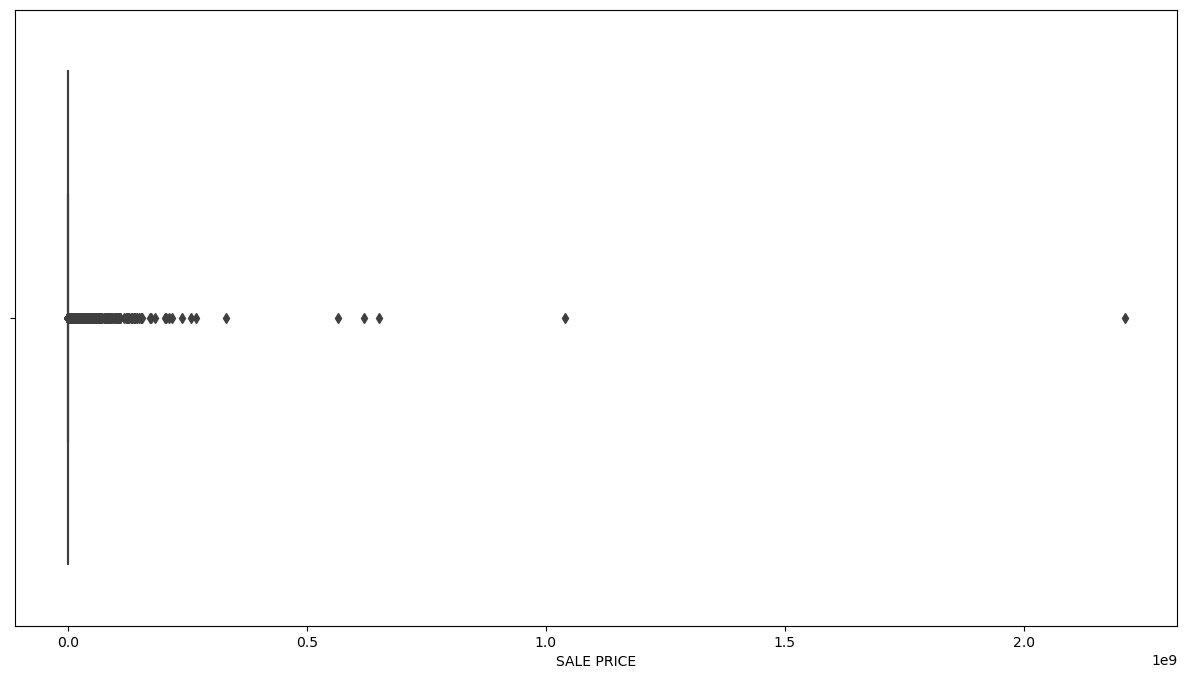

In [25]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

plt.figure(figsize=(15,8))
sns.boxplot(df_nyc["SALE PRICE"])
plt.show()

dari Box Plot diatas ternyata terdapat banyak ouliers, sehingga data perlu difilter

In [26]:
df_nyc = df_nyc[(df_nyc['SALE PRICE'] > 100000) & (df_nyc['SALE PRICE'] < 800000)]

melihat Box Plot setelah difilter

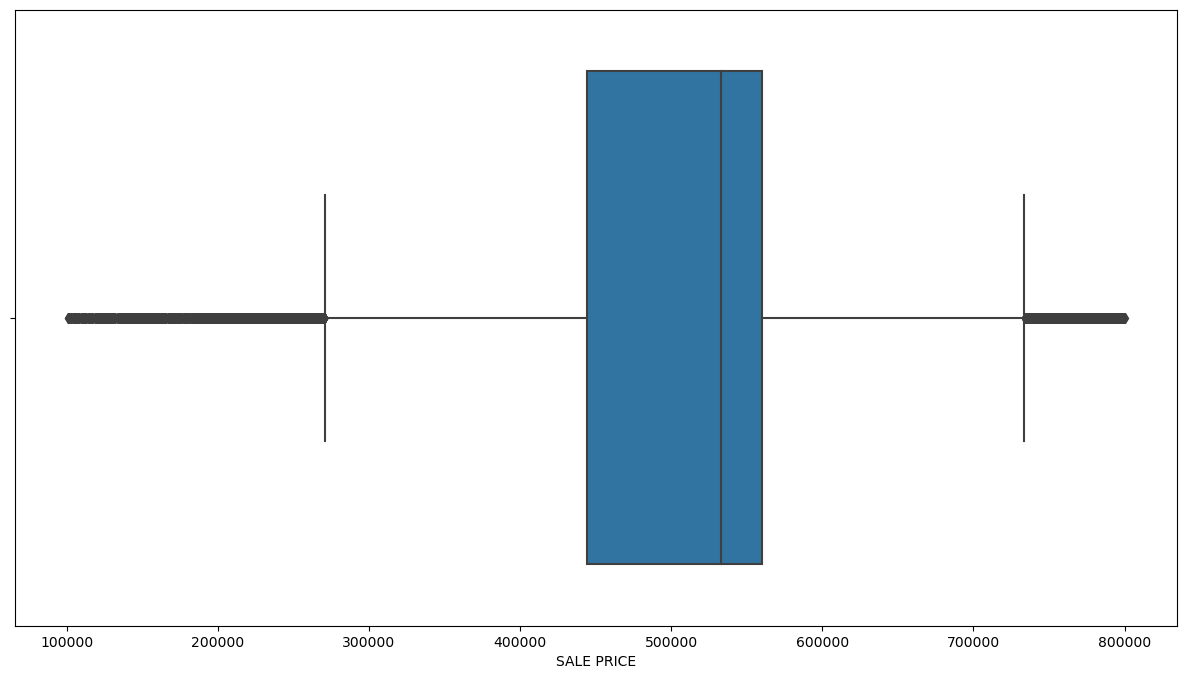

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(df_nyc["SALE PRICE"])
plt.show()

encode nama wilayah pada kolom BOROUGH

In [28]:
df_nyc['BOROUGH']= df_nyc['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Queens', 4:'Brooklyn', 5:'Staten Island'})
df_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31.0,4616.0,18690.0,1900.0,2,C7,533000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17.0,2212.0,7803.0,1900.0,2,C7,533000.0,2016-12-09
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,10009,20,0,20.0,2581.0,9730.0,1900.0,2,C4,533000.0,2017-07-20
7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,10009,44,2,46.0,5163.0,21007.0,1900.0,2,C7,533000.0,2017-07-20
8,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,10009,15,0,15.0,1534.0,9198.0,1920.0,2,D5,533000.0,2017-06-20


### Exploratory Data Analysis

### Mean

menghitung Mean dari tiap wilayah di NYC

In [29]:
mean = df_nyc.groupby('BOROUGH').mean()
mean

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,,,,,,,,,,,
Bronx,4229.494257,118.194289,10458.134887,2.068592,0.046275,2.114539,2620.252379,2278.153922,1942.453889,1.119790,454719.496226
Brooklyn,7722.878476,229.919006,11383.270396,2.207634,0.225866,2.466881,3921.786136,2888.354014,1947.235310,1.313418,518863.461569
Manhattan,1162.025715,1046.780135,10019.191257,5.309225,0.945034,6.371906,2941.598843,8586.459981,1958.189007,2.300546,551868.071038
Queens,5154.577713,371.171405,11220.657190,1.754513,0.058726,1.822992,1981.770284,1704.962440,1950.050633,1.344470,531021.716746
Staten Island,3261.245902,215.497933,10302.356807,1.288952,0.058731,1.350677,4296.569779,1872.173913,1968.537562,1.115324,479749.732431


Kesimpulan :
- Berdasarkan tabel diatas, secara keseluruhan wilayah Manhattan memiliki jumlah rata-rata tertinggi dibandingkan 4 wilayah lainnya.

menghitung Mean dari tiap wilayah di NYC berdasarkan TOTAL UNITS

In [30]:
mean2 = df_nyc[['BOROUGH','TOTAL UNITS']].groupby('BOROUGH').mean().sort_values(by='TOTAL UNITS', ascending=False)
mean2

,TOTAL UNITS
BOROUGH,
Manhattan,6.371906
Brooklyn,2.466881
Bronx,2.114539
Queens,1.822992
Staten Island,1.350677


Kesimpulan :
- Berdasarkan tabel di atas, dilihat dari TOTAL UNITS wilayah Manhattan memiliki jumlah rata-rata tertinggi yaitu sebesar 5,461046 total units dibandingkan 4 wilayah yang lain. 

menghitung Mean dari tiap wilayah di NYC berdasarkan SALE PRICE

In [31]:
mean3 = df_nyc[['BOROUGH','SALE PRICE']].groupby('BOROUGH').mean().sort_values(by='SALE PRICE', ascending=False)
mean3

,SALE PRICE
BOROUGH,
Manhattan,551868.071038
Queens,531021.716746
Brooklyn,518863.461569
Staten Island,479749.732431
Bronx,454719.496226


Kesimpulan :
- Berdasarkan tabel di atas, dilihat dari SALE PRICE wilayah Manhattan memiliki jumlah rata-rata tertinggi yaitu sebesar $551868 dibandingkan 4 wilayah yang lain. 

### Median

menghitung Median dari tiap wilayah di NYC

In [32]:
median = df_nyc.groupby('BOROUGH').median()
median

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,,,,,,,,,,,
Bronx,4369.0,41.0,10466.0,2.0,0.0,2.0,2492.0,1998.0,1935.0,1.0,450000.0
Brooklyn,8618.5,43.0,11411.0,1.0,0.0,1.0,2500.0,1680.0,1940.0,1.0,533000.0
Manhattan,1226.0,1113.0,10023.0,1.0,0.0,1.0,2314.0,1680.0,1967.0,2.0,533000.0
Queens,4920.0,55.0,11221.0,1.0,0.0,1.0,1900.0,1440.0,1931.0,1.0,550000.0
Staten Island,3040.0,58.0,10308.0,1.0,0.0,1.0,3000.0,1640.0,1975.0,1.0,533000.0


Kesimpulan :
- Berdasarkan tabel diatas, secara keseluruhan wilayah Manhattan memiliki jumlah median tertinggi dibandingkan 4 wilayah lainnya.

menghitung Median dari tiap wilayah di NYC berdasarkan TOTAL UNITS

In [33]:
median2 = df_nyc[['BOROUGH','TOTAL UNITS']].groupby('BOROUGH').median().sort_values(by='TOTAL UNITS', ascending=False)
median2

,TOTAL UNITS
BOROUGH,
Bronx,2.0
Brooklyn,1.0
Manhattan,1.0
Queens,1.0
Staten Island,1.0


Kesimpulan :
- Berdasarkan tabel di atas, dilihat dari TOTAL UNITS wilayah Bronx memiliki jumlah median tertinggi yaitu sebesar 2 total units dibandingkan 4 wilayah yang lain yang sama-sama sebesar 1 total unit. 

menghitung Median dari tiap wilayah di NYC berdasarkan SALE PRICE

In [34]:
median3 = df_nyc[['BOROUGH','SALE PRICE']].groupby('BOROUGH').median().sort_values(by='SALE PRICE', ascending=False)
median3

,SALE PRICE
BOROUGH,
Queens,550000.0
Brooklyn,533000.0
Manhattan,533000.0
Staten Island,533000.0
Bronx,450000.0


Kesimpulan :
- Berdasarkan tabel di atas, dilihat dari SALE PRICE wilayah Queens memiliki jumlah median tertinggi yaitu sebesar $550000 dibandingkan 4 wilayah yang lain. 

### Modus

menghitung Modus dari tiap wilayah di NYC berdasarkan TOTAL UNITS

In [35]:
mode2 = df_nyc[['BOROUGH','TOTAL UNITS']].groupby(['BOROUGH']).apply(pd.DataFrame.mode).reset_index(drop=True)
mode2

,BOROUGH,TOTAL UNITS
0,Bronx,2.0
1,Brooklyn,1.0
2,Manhattan,1.0
3,Queens,1.0
4,Staten Island,1.0


Kesimpulan :
- Berdasarkan tabel di atas, dilihat dari TOTAL UNITS wilayah Bronx memiliki jumlah modus tertinggi yaitu sebesar 2 total units dibandingkan 4 wilayah yang lain yang sama-sama sebesar 1 total unit.

menghitung Modus dari tiap wilayah di NYC berdasarkan SALE PRICE

In [36]:
mode3 = df_nyc[['BOROUGH','SALE PRICE']].groupby(['BOROUGH']).apply(pd.DataFrame.mode).reset_index(drop=True)
mode3

,BOROUGH,SALE PRICE
0,Bronx,500000.0
1,Brooklyn,533000.0
2,Manhattan,533000.0
3,Queens,700000.0
4,Staten Island,533000.0


Kesimpulan :
- Berdasarkan tabel di atas, dilihat dari SALE PRICE wilayah Queens memiliki jumlah modus tertinggi yaitu sebesar $700000 dibandingkan 4 wilayah yang lain.

### Range

menghitung Range dari tiap wilayah di NYC berdasarkan TOTAL UNITS

In [37]:
range = df_nyc.groupby('BOROUGH').apply(lambda x: x['TOTAL UNITS'].max() - x['TOTAL UNITS'].min())
range

BOROUGH
Bronx             461.0
Brooklyn         2260.0
Manhattan        1652.0
Queens            323.0
Staten Island     142.0
dtype: float64

Kesimpulan :
- Berdasarkan output di atas, dilihat dari TOTAL UNITS wilayah Brooklyn memiliki jumlah range tertinggi yaitu sebesar 2260 total units dibandingkan 4 wilayah yang lain.

menghitung Range dari tiap wilayah di NYC berdasarkan SALE PRICE

In [38]:
range2 = df_nyc.groupby('BOROUGH').apply(lambda x: x['SALE PRICE'].max() - x['SALE PRICE'].min())
range2

BOROUGH
Bronx            697500.0
Brooklyn         698634.0
Manhattan        691680.0
Queens           698326.0
Staten Island    698300.0
dtype: float64

Kesimpulan :
- Berdasarkan output di atas, dilihat dari SALE PRICE kelima wilayah memiliki jumlah range yang tidak jauh berbeda.

### Variance

menghitung Varians dari tiap wilayah di NYC

In [39]:
var = df_nyc.groupby('BOROUGH').var()
var

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,,,,,,,,,,,
Bronx,8.998643e+05,70474.574189,71927.687315,73.524841,0.072382,73.509857,8.828127e+06,5.613665e+07,998.645854,0.213814,2.292858e+10
Brooklyn,1.970488e+07,227306.659603,46544.033066,550.275505,335.528177,895.808833,2.417852e+09,1.953598e+09,927.197200,0.577633,1.558957e+10
Manhattan,3.142175e+05,717910.228171,98352.808747,1350.462548,168.305338,1529.207301,5.069350e+07,3.318655e+09,1593.448509,0.643083,6.686725e+09
Queens,6.275066e+06,291303.238775,163.471913,42.074012,0.124197,42.154008,2.533582e+08,7.328386e+07,1610.734256,0.393977,2.853781e+10
Staten Island,5.119743e+06,204110.845412,60582.377518,3.765226,2.375221,6.028134,7.767154e+08,7.213998e+07,963.340726,0.250884,1.781652e+10


Kesimpulan :
- Berdasarkan tabel di atas, secara keseluruhan pada sebagian besar wilayah memiliki nilai varians yang tinggi yang berarti bahwa data tersebut memiliki distribusi yang besar.

### Standard Deviation

menghitung Standar Deviasi dari tiap wilayah di NYC

In [40]:
stdev = df_nyc.groupby('BOROUGH').std()
stdev

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,,,,,,,,,,,
Bronx,948.611759,265.470477,268.193377,8.574663,0.269039,8.573789,2971.216482,7492.439587,31.601358,0.462400,151421.869236
Brooklyn,4439.017348,476.766882,215.740662,23.457952,18.317428,29.930066,49171.654954,44199.529479,30.449913,0.760022,124858.189065
Manhattan,560.551027,847.295833,313.612514,36.748640,12.973255,39.105080,7119.937134,57607.771999,39.918022,0.801925,81772.396199
Queens,2505.008121,539.725151,12.785614,6.486448,0.352416,6.492612,15917.228446,8560.599356,40.133954,0.627676,168931.371636
Staten Island,2262.684895,451.786283,246.134877,1.940419,1.541175,2.455226,27869.614505,8493.525502,31.037731,0.500884,133478.522279


Kesimpulan :
- Berdasarkan tabel di atas, secara keseluruhan pada sebagian besar wilayah memiliki nilai standar deviasi yang tinggi yang berarti bahwa data tersebut memiliki distribusi yang besar.

### Probability Distribution

import library 

In [41]:
from scipy.stats import norm

melihat distribusi probabilitas dari wilayah Bronx berdasarkan SALE PRICE

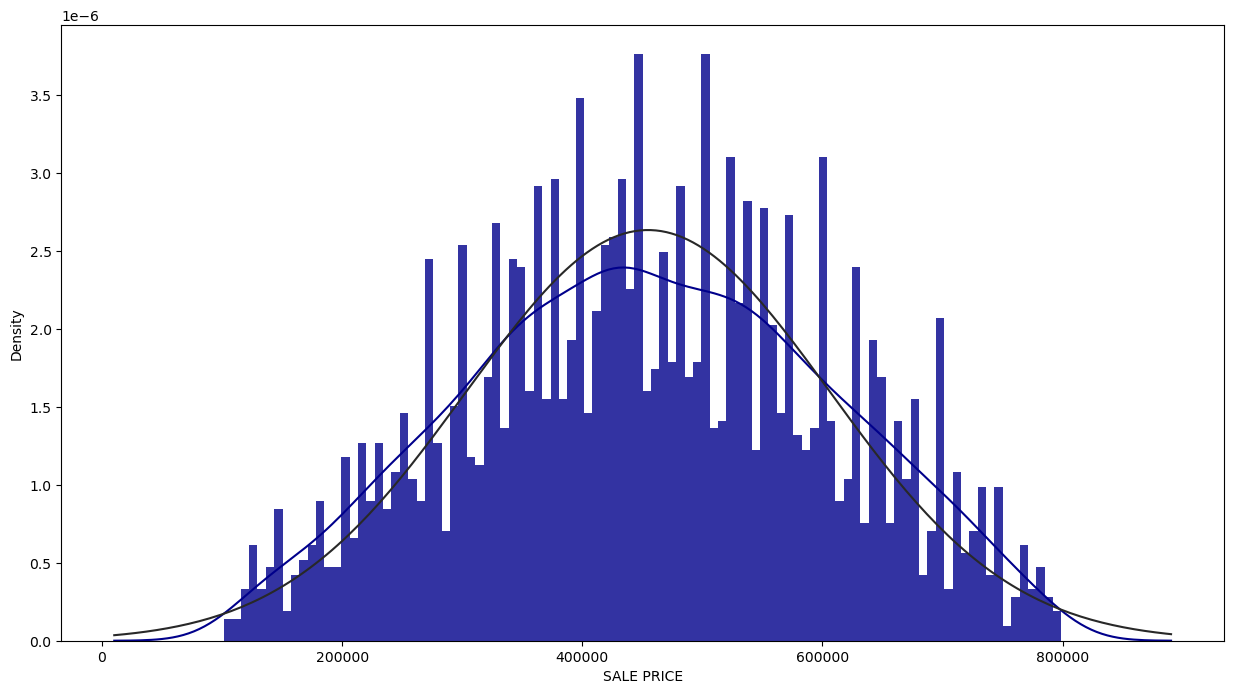

In [42]:
df_br =df_nyc.groupby("BOROUGH")
bronx = df_br.get_group('Bronx')
df_bronx = pd.Series(bronx['SALE PRICE'].values, name="SALE PRICE")

plt.figure(figsize=(15,8))
ax = sns.distplot(df_bronx, 
                  fit=norm, 
                  kde=True, 
                  bins=100,
                  color='darkblue',
                  hist_kws={"linewidth": 15,'alpha':0.8})

kesimpulan : 
- Berdasarkan plot di atas dapat disimpulkan bahwa SALE PRICE dari wilayah Bronx memiliki distribusi normal karena kurva simetris di nilai pusat.

### Confidence Intervals

Calculation of CI of Mean

mengambil data mean, standar deviasi, dan size dari kolom SALE PRICE berdasarkan masing-masing wilayah di NYC

In [43]:
df_nyc.groupby("BOROUGH").agg({'SALE PRICE' : [np.mean, np.std, np.size]})

SALE PRICE                      
                        mean            std   size
BOROUGH                                           
Bronx          454719.496226  151421.869236   3047
Brooklyn       518863.461569  124858.189065  15248
Manhattan      551868.071038   81772.396199   3111
Queens         531021.716746  168931.371636   4819
Staten Island  479749.732431  133478.522279   7015

mengekstrak parameter yang diperlukan untuk populasi di wilayah Bronx

In [44]:
mean_bronx = 454719.496226
std_bronx = 151421.869236
n_bronx = 3047
z = 1.96

- z di atas 1.96 adalah z-score untuk confidence level 95%.

kalkulasi standar error menggunakan formula untuk standar error CI of Mean

In [45]:
se = std_bronx / np.sqrt(n_bronx)
se

2743.1678105188857

menghitung lower limit dan upper limit dari CI 

In [46]:
# lower limit
lb = mean_bronx - z * se

# upper limit
ub = mean_bronx + z * se

print('Lower limit :', lb)
print('Upper limit :', ub)

Lower limit : 449342.887317383
Upper limit : 460096.105134617


Kesimpulan :
- Dari hasil lower limit dan upper limit di atas, dapat disimpulkan bahwa rata-rata sebenarnya dari SALE PRICE di wilayah Bronx akan turun antara 449342.887317383 dan 460096.105134617.

### Hypothesis Testing

#### **Normality Test**

#### **Shapiro-Wilk Test**

=>  Test weather a data sample has a Gaussian distribution.

**Assumptions** :
- Observations in each sample are independent and identically distributed (iid).

**Interpretation** :
- H0 : The sample has a Gaussian distribution.
- H1 : The sample does not have a Gaussian distribution.

**Significance level** : 
- Alpha = 0.05

**Critical region** :
- H0 is rejected if p-value < 0.05

In [47]:
from scipy.stats import shapiro

df_br = df_nyc.groupby('BOROUGH').mean()
data_bx = df_nyc[df_nyc['BOROUGH']=='Bronx']

stat, p = shapiro(data_bx['SALE PRICE'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.991, p=0.000
Probably not Gaussian


Kesimpulan : 
- Karena p-value < 0.05 maka H0 ditolak yang artinya sampel tidak memiliki distribusi Gaussian.

### Overall Analysis

Berdasarkan analisis di atas dapat diambil beberapa kesimpulan antara lain :
- Dataset NYC Rolling Sale masih terdapat banyak missing value sehingga perlu dilakukan pre-processing data dengan data cleaning.
- Dilihat dari boxplot SALE PRICE di masing-masing wilayah NYC masih terdapat banyak outliers sehingga harus difilter terlebih dahulu. 
- Berdasarkan probability distribution dari SALE PRICE pada masing-masing wilayah di NYC, semua wilayah memiliki distribusi yang besar namun hanya wilayah Bronx yang berdistribusi normal.
- Berdasarkan hypothesis testing menggunakan Shapiro-Wilk test, dilihat dari p-value disimpulkan bahwa sampel tidak memiliki distribusi Gaussian.